In [117]:
import pandas as pd

df = pd.read_csv('data/adult.csv', header=None)


In [118]:
from sklearn.model_selection import train_test_split

random_state = 42

def apply_col_names(df: pd.DataFrame):

    col_names = ['age', 'workclass', 'fnlwgt', 'education',
    'education_num', 'Marital status', 'occupation',
    'relationship', 'race', 'sex', 'capitalgain',
    'capitalloss', 'hoursperweek', 'native', 'Salary']

    df.columns = col_names

    return df


In [138]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler

def transform_categorical(df: pd.DataFrame):

    df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

    df_categorical = df.select_dtypes(include='object')
    print(f'There are {len(df_categorical.columns)} categorical columns.')

    df_non_categorical = df[[col for col in df.columns 
                                if col not in df_categorical.columns]]
    ohe = OneHotEncoder(sparse=False)
    scaler = RobustScaler()
    encoded_array = ohe.fit_transform(df_categorical)
    one_hot_encoded_data = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out())

    df_non_categorical[df_non_categorical.columns] = scaler.fit_transform(df_non_categorical)
    processed_data = pd.concat([df_non_categorical, one_hot_encoded_data], axis=1)
    Y: pd.Series = [el.strip() == '>50K' for el in df['Salary']]
    print(f'{Y=}')
    X: pd.DataFrame = processed_data[processed_data.columns.difference(['Salary'])]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=random_state, test_size=0.2)
    return X_train, X_test, Y_train, Y_test

Now lets transform our data.

In [ ]:
preprocessed_df = apply_col_names(df)
X_train, X_test, Y_train, Y_test = transform_categorical(preprocessed_df)

accuracy: 0.998
precision: 0.993
recall: 1.000
f1: 0.997
y_pred_prob=array([1.65633891e-14, 3.70558009e-08, 1.00000000e+00, ...,
       1.00000000e+00, 8.08337724e-14, 4.48586224e-16])
fpr=array([0.        , 0.00222582, 1.        ])
tpr=array([0., 1., 1.])


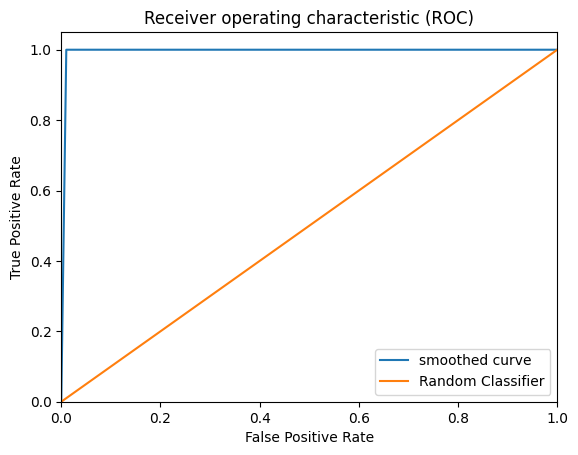

True Negatives: 4931, False Positives: 11, False Negatives: 0, True Positives: 1571


In [168]:
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


metric_list = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}


gnb = GaussianNB()


gnb.fit(X_train, Y_train)

y_pred = gnb.predict(X_test)
for name, metric in metric_list.items():
    print(f'{name}: {metric(Y_test, y_pred):.3f}')


y_pred_prob = gnb.predict_proba(X_test)[:,1]

print(f'{y_pred_prob=}')

fpr, tpr, _ = roc_curve(Y_test, y_pred, drop_intermediate=False)

roc_auc = auc(fpr, tpr)

print(f'{fpr=}')
print(f'{tpr=}')

from scipy.interpolate import interp1d
import numpy as np

f = interp1d(fpr, tpr)
xnew = np.linspace(0, 1, num=100)

ynew = f(xnew)
plt.plot(xnew, ynew, label='smoothed curve')
# plt.plot(fpr, tpr, label= f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')

